## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

data = norm.rvs(size=10000, loc=4, scale=5)
ax = plt.hist(data, bins=50)
plt.xlabel('Нормальное распределение')
plt.ylabel('Плотность')
plt.show(ax)

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("./train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
taxi_data['pickup_datetime']

0          2016-03-14 17:24:55
1          2016-06-12 00:43:35
2          2016-01-19 11:35:24
3          2016-04-06 19:32:31
4          2016-03-26 13:30:55
                  ...         
1458639    2016-04-08 13:31:04
1458640    2016-01-10 07:35:15
1458641    2016-04-22 06:57:41
1458642    2016-01-05 15:56:26
1458643    2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: object

In [3]:
# ваш код здесь
taxi_data['pickup_datetime'] = taxi_data['pickup_datetime'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

In [5]:
taxi_data['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [6]:
data_list = taxi_data['pickup_datetime'].to_list()

In [7]:
min(data_list)

Timestamp('2016-01-01 00:00:17')

In [8]:
max(data_list)

Timestamp('2016-06-30 23:59:39')

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [9]:
# ваш код здесь
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [10]:
# vendor_id = таксопарк
pd.set_option('display.float_format', lambda x: '%.5f' % x)
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


In [11]:
taxi_data['vendor_id'].unique()

array([2, 1])

In [12]:
stat_data = taxi_data.describe()
stat_data.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [13]:
round( stat_data['trip_duration'].loc['mean'] )

959

In [14]:
round( stat_data['trip_duration'].loc['50%'] ) # медиана

662

In [15]:
round( stat_data['trip_duration'].loc['min'] )

1

In [16]:
round( stat_data['trip_duration'].loc['max'] )

3526282

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [17]:
taxi_data['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [4]:
time_df = pd.DataFrame(taxi_data['pickup_datetime'])
time_df

,pickup_datetime
0,2016-03-14 17:24:55
1,2016-06-12 00:43:35
2,2016-01-19 11:35:24
3,2016-04-06 19:32:31
4,2016-03-26 13:30:55
...,...
1458639,2016-04-08 13:31:04
1458640,2016-01-10 07:35:15
1458641,2016-04-22 06:57:41
1458642,2016-01-05 15:56:26


In [19]:
time_df['pickup_datetime'][0] # timestamp

Timestamp('2016-03-14 17:24:55')

In [20]:
time_df['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [5]:
def add_datetime_features(dataframe):
    dataframe['pickup_date'] = dataframe['pickup_datetime'].apply(lambda x: x.date())
    dataframe['pickup_hour'] = dataframe['pickup_datetime'].apply(lambda x: x.hour)
    dataframe['pickup_day_of_week'] = dataframe['pickup_datetime'].apply(lambda x: x.day_name())
    return dataframe

In [6]:
time_df = add_datetime_features(time_df)

In [23]:
time_df.groupby('pickup_day_of_week').count()

,pickup_datetime,pickup_date,pickup_hour
pickup_day_of_week,,,
Friday,223533,223533,223533
Monday,187418,187418,187418
Saturday,220868,220868,220868
Sunday,195366,195366,195366
Thursday,218574,218574,218574
Tuesday,202749,202749,202749
Wednesday,210136,210136,210136


In [24]:
time_df.groupby('pickup_date').count().describe()

,pickup_datetime,pickup_hour,pickup_day_of_week
count,182.00000,182.00000,182.00000
mean,8014.52747,8014.52747,8014.52747
std,925.76709,925.76709,925.76709
min,1648.00000,1648.00000,1648.00000
25%,7620.50000,7620.50000,7620.50000
50%,8091.00000,8091.00000,8091.00000
75%,8535.00000,8535.00000,8535.00000
max,9796.00000,9796.00000,9796.00000


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [7]:
holiday_data = pd.read_csv('./holiday_data.csv', sep=';')
holiday_data['date'] = pd.to_datetime(holiday_data['date'])
holiday_data.head()

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day


In [26]:
holiday_data['date']

0    2016-01-01
1    2016-01-18
2    2016-02-12
3    2016-02-15
4    2016-05-08
5    2016-05-30
6    2016-06-19
7    2016-07-04
8    2016-09-05
9    2016-10-10
10   2016-11-11
11   2016-11-24
12   2016-12-26
13   2016-11-08
Name: date, dtype: datetime64[ns]

In [27]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   day      14 non-null     object        
 1   date     14 non-null     datetime64[ns]
 2   holiday  14 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 464.0+ bytes


In [28]:
holiday_list = holiday_data['date'].to_list()
holiday_list

[Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-01-18 00:00:00'),
 Timestamp('2016-02-12 00:00:00'),
 Timestamp('2016-02-15 00:00:00'),
 Timestamp('2016-05-08 00:00:00'),
 Timestamp('2016-05-30 00:00:00'),
 Timestamp('2016-06-19 00:00:00'),
 Timestamp('2016-07-04 00:00:00'),
 Timestamp('2016-09-05 00:00:00'),
 Timestamp('2016-10-10 00:00:00'),
 Timestamp('2016-11-11 00:00:00'),
 Timestamp('2016-11-24 00:00:00'),
 Timestamp('2016-12-26 00:00:00'),
 Timestamp('2016-11-08 00:00:00')]

In [29]:
time_df['pickup_date']

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: pickup_date, Length: 1458644, dtype: object

In [8]:
taxi_data['pickup_date'] = time_df['pickup_date']

In [31]:
taxi_data['pickup_date']

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: pickup_date, Length: 1458644, dtype: object

In [9]:
def add_holiday_features(taxi_data, holiday_data):
    # taxi_data['pickup_date'] #дата поездки
    # holiday_data['date'] #дата праздника
    holiday_list = holiday_data['date'].to_list()
    taxi_data['pickup_holiday'] = 1 * taxi_data['pickup_date'].apply(lambda x: x in holiday_list)
    return taxi_data

In [10]:
taxi_data = add_holiday_features(taxi_data, holiday_data)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  """


In [34]:
taxi_data['pickup_holiday'].value_counts()

0    1407522
1      51122
Name: pickup_holiday, dtype: int64

In [27]:
taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].describe()

count    51122.000000
mean       867.610207
std       3123.482812
min          2.000000
25%        356.000000
50%        585.000000
75%        964.000000
max      86392.000000
Name: trip_duration, dtype: float64

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [11]:
osrm_data = pd.read_csv('./osrm_data_train.csv') #выгрузка по каждой поездке из Open Source Routing Machine

In [12]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0


In [14]:
taxi_data.to_csv('taxi_data.csv', index = False)
osrm_data.head()
#id = идентификатор поездки, total_distance = кратчайшее дорожное расстояние по OSRM
#total_travel_time = наименьшее время поездки по OSRM, number_of_steps = кол-во дискретных шагов

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [20]:
osrm_data = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']].set_index('id')
osrm_data.head()

,total_distance,total_travel_time,number_of_steps
id,,,
id2875421,2009.1,164.9,5
id2377394,2513.2,332.0,6
id3504673,1779.4,235.8,4
id2181028,1614.9,140.1,5
id0801584,1393.5,189.4,5


In [21]:
taxi_data = taxi_data.join(osrm_data, on = 'id')

In [22]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0


In [44]:
taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()

372.5

In [33]:
taxi_data[taxi_data.isna().any(axis = 1)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps
1133561,id3008062,2,2016-06-23 19:04:09,2016-06-23 19:04:35,1,-73.787537,40.64241,-73.787811,40.642109,N,26,2016-06-23,0,NaN,NaN,NaN


In [15]:
def get_haversine_distance(lat1, lng1, lat2, lng2): #-> вычисление расстояния Хаверсина
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2): #-> вычисление угла направления движения
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [45]:
get_haversine_distance(taxi_data['pickup_latitude'], 
                       taxi_data['pickup_longitude'],
                       taxi_data['dropoff_latitude'],
                       taxi_data['dropoff_longitude'])                   

0          1.498521
1          1.805507
2          6.385098
3          1.485498
4          1.188588
             ...   
1458639    1.225080
1458640    6.049836
1458641    7.824606
1458642    1.092564
1458643    1.134042
Length: 1458644, dtype: float64

In [47]:
taxi_data['haversine'] = get_haversine_distance(taxi_data['pickup_latitude'], 
                       taxi_data['pickup_longitude'],
                       taxi_data['dropoff_latitude'],
                       taxi_data['dropoff_longitude'])    

In [48]:
get_angle_direction(taxi_data['pickup_latitude'], 
                       taxi_data['pickup_longitude'],
                       taxi_data['dropoff_latitude'],
                       taxi_data['dropoff_longitude']) 

0           99.970196
1         -117.153768
2         -159.680165
3         -172.737700
4          179.473585
              ...    
1458639   -119.059338
1458640     25.342196
1458641   -150.788492
1458642     35.033294
1458643     29.969486
Length: 1458644, dtype: float64

In [49]:
taxi_data['direction'] = get_angle_direction(taxi_data['pickup_latitude'], 
                       taxi_data['pickup_longitude'],
                       taxi_data['dropoff_latitude'],
                       taxi_data['dropoff_longitude']) 

In [50]:
taxi_data['haversine'].median()

2.0937171329263693

In [51]:
taxi_data.to_csv('taxi_data.csv', index = False)

In [67]:
taxi_data = pd.read_csv('taxi_data.csv')

In [68]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [52]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))

In [54]:
pd.DataFrame(coords)

,0,1,2,3
0,40.767937,-73.982155,40.765602,-73.964630
1,40.738564,-73.980415,40.731152,-73.999481
2,40.763939,-73.979027,40.710087,-74.005333
3,40.719971,-74.010040,40.706718,-74.012268
4,40.793209,-73.973053,40.782520,-73.972923
...,...,...,...,...
1458639,40.745522,-73.982201,40.740170,-73.994911
1458640,40.747379,-74.000946,40.796547,-73.970184
1458641,40.768799,-73.959129,40.707371,-74.004433
1458642,40.749062,-73.982079,40.757107,-73.974632


In [55]:
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

KMeans(n_clusters=10, random_state=42)

In [60]:
kmeans.labels_

array([9, 4, 4, ..., 4, 0, 9], dtype=int32)

In [69]:
taxi_data['geo_cluster'] = kmeans.labels_

In [62]:
taxi_data['geo_cluster'].value_counts()

0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [133]:
weather_data = pd.read_csv('./weather_data.csv')

In [79]:
weather_data.head()
#time = дата измерения, temperature = температура, visibility = видимости, wind speed = средняя скорость ветра,
#precip = кол-во осадков, events = погодные явления: Rain, Snow, Fog, None = отсутствуют

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31,0
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31,0
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31,0
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31,0
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31,0


In [137]:
weather_data[['time', 'temperature', 'visibility', 'wind speed', 'precip', 'events']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8787 non-null   object 
 1   temperature  8787 non-null   float64
 2   visibility   8787 non-null   float64
 3   wind speed   8787 non-null   float64
 4   precip       8787 non-null   float64
 5   events       8787 non-null   object 
dtypes: float64(4), object(2)
memory usage: 412.0+ KB


In [138]:
weather_data = weather_data[['time', 'temperature', 'visibility', 'wind speed', 'precip', 'events']]

In [63]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196,9
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768,4
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165,4
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585,9


In [64]:
def add_datetime_features(dataframe):
    dataframe['pickup_date'] = dataframe['pickup_datetime'].apply(lambda x: x.date())
    dataframe['pickup_hour'] = dataframe['pickup_datetime'].apply(lambda x: x.hour)
    dataframe['pickup_day_of_week'] = dataframe['pickup_datetime'].apply(lambda x: x.day_name())
    return dataframe

In [70]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])

In [102]:
taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_date'])

In [103]:
taxi_data['pickup_date']

0         2016-03-14
1         2016-06-12
2         2016-01-19
3         2016-04-06
4         2016-03-26
             ...    
1458639   2016-04-08
1458640   2016-01-10
1458641   2016-04-22
1458642   2016-01-05
1458643   2016-04-05
Name: pickup_date, Length: 1458644, dtype: datetime64[ns]

In [72]:
add_datetime_features(taxi_data)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196,9,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768,4,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165,4,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700,4,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585,9,13,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,2016-04-08,0,2234.6,311.7,8.0,1.225080,-119.059338,0,13,Friday
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,2016-01-10,0,7638.0,589.6,11.0,6.049836,25.342196,9,7,Sunday
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,2016-04-22,0,9871.5,642.9,10.0,7.824606,-150.788492,4,6,Friday
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,2016-01-05,0,1628.3,161.6,7.0,1.092564,35.033294,0,15,Tuesday


In [94]:
pd.to_datetime(pd.to_datetime(weather_data['time']).apply(lambda x: x.date()))

0      2015-12-31
1      2015-12-31
2      2015-12-31
3      2015-12-31
4      2015-12-31
          ...    
8782   2017-01-01
8783   2017-01-01
8784   2017-01-01
8785   2017-01-02
8786   2017-01-02
Name: time, Length: 8787, dtype: datetime64[ns]

In [139]:
weather_data['date'] = pd.to_datetime(pd.to_datetime(weather_data['time']).apply(lambda x: x.date()))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
weather_data['date']

0      2015-12-31
1      2015-12-31
2      2015-12-31
3      2015-12-31
4      2015-12-31
          ...    
8782   2017-01-01
8783   2017-01-01
8784   2017-01-01
8785   2017-01-02
8786   2017-01-02
Name: date, Length: 8787, dtype: datetime64[ns]

In [142]:
weather_data['hour'] = pd.to_datetime(weather_data['time']).apply(lambda x: x.hour)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
weather_data[['date', 'hour', 'temperature']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         8787 non-null   datetime64[ns]
 1   hour         8787 non-null   int64         
 2   temperature  8787 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 206.1 KB


In [149]:
weather_data = weather_data[['date', 'hour', 'temperature']]

In [152]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster,pickup_hour,pickup_day_of_week,time,visibility,wind speed,precip,events,date,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455,2016-03-14,0,"2,009.10000",164.90000,5.00000,1.49852,99.97020,9,17,Monday,2016-03-14 17:00:00,8.00000,27.80000,0.30000,None,2016-03-14,17.00000
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663,2016-06-12,0,"2,513.20000",332.00000,6.00000,1.80551,-117.15377,4,0,Sunday,2016-06-12 00:00:00,16.10000,7.40000,0.00000,None,2016-06-12,0.00000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124,2016-01-19,0,"11,060.80000",767.60000,16.00000,6.38510,-159.68017,4,11,Tuesday,2016-01-19 11:00:00,16.10000,24.10000,0.00000,None,2016-01-19,11.00000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429,2016-04-06,0,"1,779.40000",235.80000,4.00000,1.48550,-172.73770,4,19,Wednesday,2016-04-06 19:00:00,16.10000,25.90000,0.00000,None,2016-04-06,19.00000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435,2016-03-26,0,"1,614.90000",140.10000,5.00000,1.18859,179.47358,9,13,Saturday,2016-03-26 13:00:00,16.10000,9.30000,0.00000,None,2016-03-26,13.00000


In [153]:
weather_data.head()

,date,hour,temperature
0,2015-12-31,2,7.80000
1,2015-12-31,3,7.20000
2,2015-12-31,4,7.20000
3,2015-12-31,5,7.20000
4,2015-12-31,6,7.20000


In [157]:
taxi_data = pd.merge(taxi_data, weather_data, on = ['date', 'hour'], how = 'left')

In [104]:
taxi_data = pd.merge(taxi_data, weather_data, 
         left_on = ['pickup_date', 'pickup_hour'], 
         right_on = ['date', 'hour'], how = 'left')

In [107]:
pd.set_option('display.max_columns', None)

In [108]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster,pickup_hour,pickup_day_of_week,time,visibility,wind speed,precip,events,date,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196,9,17,Monday,2016-03-14 17:00:00,8.0,27.8,0.3,None,2016-03-14,17.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768,4,0,Sunday,2016-06-12 00:00:00,16.1,7.4,0.0,None,2016-06-12,0.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165,4,11,Tuesday,2016-01-19 11:00:00,16.1,24.1,0.0,None,2016-01-19,11.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700,4,19,Wednesday,2016-04-06 19:00:00,16.1,25.9,0.0,None,2016-04-06,19.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585,9,13,Saturday,2016-03-26 13:00:00,16.1,9.3,0.0,None,2016-03-26,13.0


In [109]:
len(taxi_data)

1458644

In [120]:
taxi_data['events'].value_counts()

None    1375185
Rain      58300
Snow      13126
Fog           1
Name: events, dtype: int64

In [113]:
taxi_data[taxi_data['events'] == 'Snow'].shape[0]

13126

In [117]:
pd.options.display.float_format = '{:,.5f}'.format

In [122]:
taxi_data['events'].isnull().sum()*100 / len(taxi_data)

0.8248757064780714

In [162]:
taxi_data.to_csv('taxi_data.csv', index = False)

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [160]:
taxi_data['temperature'].isna().sum()

12032

In [11]:
taxi_data.isna().sum().sort_values(ascending=False).nlargest(11)

temperature          12032
hour                 12032
date                 12032
events               12032
precip               12032
wind speed           12032
visibility           12032
time                 12032
total_distance           1
number_of_steps          1
total_travel_time        1
dtype: int64

In [144]:
weather_data['date']

0      2015-12-31
1      2015-12-31
2      2015-12-31
3      2015-12-31
4      2015-12-31
          ...    
8782   2017-01-01
8783   2017-01-01
8784   2017-01-01
8785   2017-01-02
8786   2017-01-02
Name: date, Length: 8787, dtype: datetime64[ns]

In [36]:
pd.set_option('display.max_columns', None)
taxi_data = pd.read_csv('taxi_data.csv')
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster,pickup_hour,pickup_day_of_week,time,visibility,wind speed,precip,events,date,hour,temperature
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196,9,17,Monday,2016-03-14 17:00:00,8.0,27.8,0.3,None,2016-03-14,17.0,4.4
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768,4,0,Sunday,2016-06-12 00:00:00,16.1,7.4,0.0,None,2016-06-12,0.0,28.9
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165,4,11,Tuesday,2016-01-19 11:00:00,16.1,24.1,0.0,None,2016-01-19,11.0,-6.7
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700,4,19,Wednesday,2016-04-06 19:00:00,16.1,25.9,0.0,None,2016-04-06,19.0,7.2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585,9,13,Saturday,2016-03-26 13:00:00,16.1,9.3,0.0,None,2016-03-26,13.0,9.4


In [9]:
taxi_data.groupby('pickup_date')['hour'].median()

pickup_date
2016-01-01    12.0
2016-01-02    15.0
2016-01-03    13.0
2016-01-04    15.0
2016-01-05    15.0
              ... 
2016-06-26    13.0
2016-06-27    14.0
2016-06-28    14.0
2016-06-29    14.0
2016-06-30    14.0
Name: hour, Length: 182, dtype: float64

In [10]:
taxi_data['total_distance'].median()

2755.1

In [37]:
values = {
          'precip': taxi_data.groupby('pickup_date')['precip'].transform('median'),
          'wind speed': taxi_data.groupby('pickup_date')['wind speed'].transform('median'),
          'visibility': taxi_data.groupby('pickup_date')['visibility'].transform('median'),
          'total_distance': taxi_data['total_distance'].median(),
          'number_of_steps': taxi_data['number_of_steps'].median(),
          'total_travel_time': taxi_data['total_travel_time'].median(),
          'temperature': taxi_data.groupby('pickup_date')['temperature'].transform('median')
         }

In [38]:
taxi_data.fillna(value = values, inplace = True)

In [34]:
taxi_data['events'].value_counts()

None    1387217
Rain      58300
Snow      13126
Fog           1
Name: events, dtype: int64

In [39]:
taxi_data['events'].fillna('None', inplace  = True)

In [40]:
taxi_data['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


In [41]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster,pickup_hour,pickup_day_of_week,time,visibility,wind speed,precip,events,date,hour,temperature
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196,9,17,Monday,2016-03-14 17:00:00,8.0,27.8,0.3,None,2016-03-14,17.0,4.4
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768,4,0,Sunday,2016-06-12 00:00:00,16.1,7.4,0.0,None,2016-06-12,0.0,28.9
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165,4,11,Tuesday,2016-01-19 11:00:00,16.1,24.1,0.0,None,2016-01-19,11.0,-6.7
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700,4,19,Wednesday,2016-04-06 19:00:00,16.1,25.9,0.0,None,2016-04-06,19.0,7.2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585,9,13,Saturday,2016-03-26 13:00:00,16.1,9.3,0.0,None,2016-03-26,13.0,9.4


In [42]:
taxi_data['trip_duration'] # <= 24*3600

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458644, dtype: int64

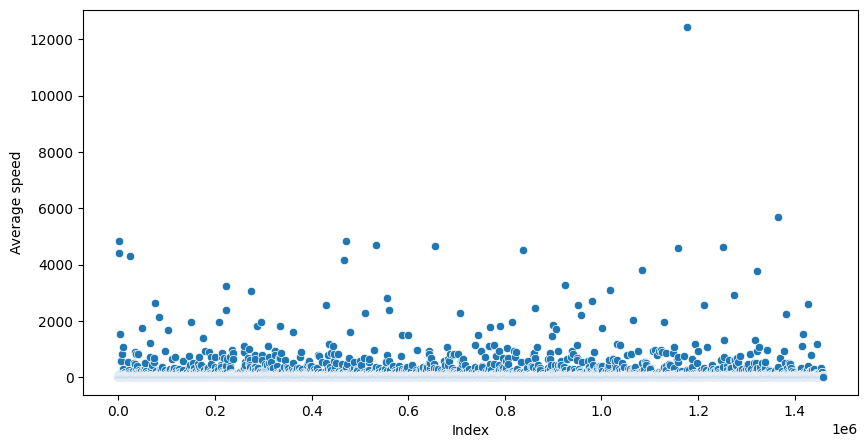

In [46]:
avg_speed = (taxi_data['total_distance'] / taxi_data['trip_duration']) * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed')

fig #optimal speed = 300 km_h

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [47]:
#avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
#taxi_data['trip_duration'] <= 24*3600
#optimal speed = 300 km_h
taxi_data['avg_speed'] = (taxi_data['total_distance'] / taxi_data['trip_duration']) * 3.6

In [49]:
taxi_data[taxi_data['trip_duration'] > 24*3600].shape[0]

4

In [51]:
taxi_data[taxi_data['avg_speed'] > 300].shape[0]

407

In [52]:
taxi_data.to_csv('taxi_data.csv', index = False)

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
taxi_data = pd.read_csv('taxi_data.csv')
taxi_data.head()

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster,pickup_hour,pickup_day_of_week,time,visibility,wind speed,precip,events,date,hour,temperature,avg_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196,9,17,Monday,2016-03-14 17:00:00,8.0,27.8,0.3,None,2016-03-14,17.0,4.4,15.896176
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768,4,0,Sunday,2016-06-12 00:00:00,16.1,7.4,0.0,None,2016-06-12,0.0,28.9,13.646335
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165,4,11,Tuesday,2016-01-19 11:00:00,16.1,24.1,0.0,None,2016-01-19,11.0,-6.7,18.747119
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700,4,19,Wednesday,2016-04-06 19:00:00,16.1,25.9,0.0,None,2016-04-06,19.0,7.2,14.932028
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585,9,13,Saturday,2016-03-26 13:00:00,16.1,9.3,0.0,None,2016-03-26,13.0,9.4,13.364690


In [2]:
taxi_data = taxi_data[taxi_data['trip_duration'] <= 24*3600]
taxi_data = taxi_data[taxi_data['avg_speed'] <= 300]

In [4]:
import numpy as np
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration'] + 1)

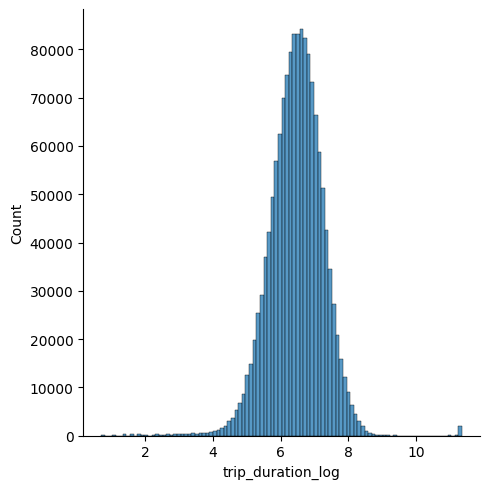

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure()
f.clear()
plt.close(f)
sns.displot(taxi_data.trip_duration_log, bins=100) #сразу считает count признака

plt.show()

In [49]:
from scipy.stats import normaltest #Д'Агостино

#If the p-val is very small, it means it is unlikely that the data came from a normal distribution
k2, p = normaltest(taxi_data.trip_duration_log)

p < 0.05 # null hypothesis: x comes from a normal distribution

#True
#The null hypothesis can be rejected

True

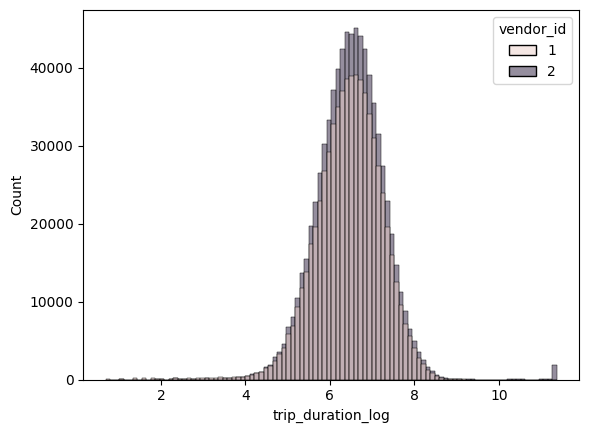

In [15]:
sns.histplot(data=taxi_data, x='trip_duration_log', hue='vendor_id', bins=100) #тоже сразу читает count признака
plt.show()

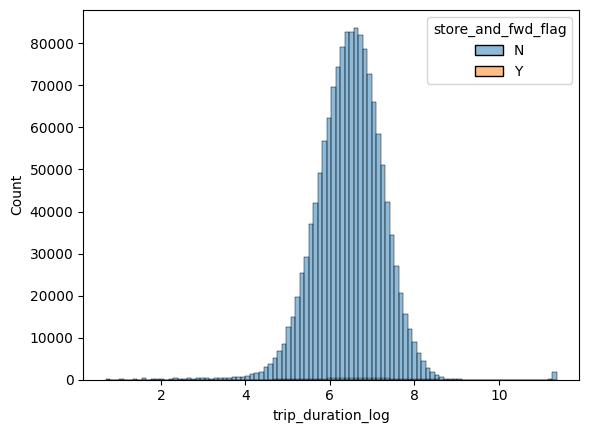

In [17]:
sns.histplot(data=taxi_data, x='trip_duration_log', hue='store_and_fwd_flag', bins=100)
plt.show()

In [27]:
taxi_data.groupby('store_and_fwd_flag')['id'].count()

store_and_fwd_flag
N    1450192
Y       8041
Name: id, dtype: int64

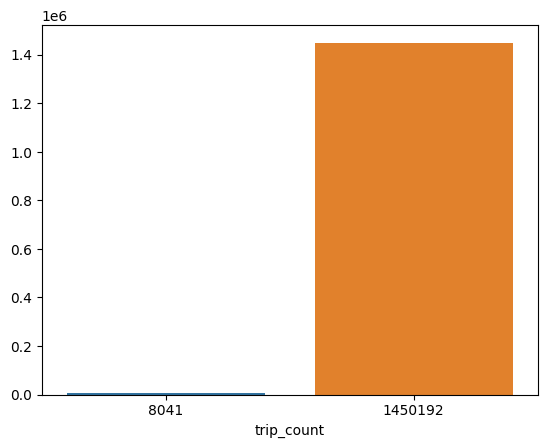

In [39]:
sns.barplot(data = taxi_data.groupby('store_and_fwd_flag')['id'].count(),
            x = taxi_data.groupby('store_and_fwd_flag')['id'].count().index,
            y = taxi_data.groupby('store_and_fwd_flag')['id'].count().values)

plt.xlabel('trip_count')
plt.show()

In [41]:
hue_hour = pd.Series(
    taxi_data.groupby('pickup_hour')['id'].count().sort_values(ascending = False)) #values, index

hue_hour.name = 'trip_count'
hue_hour

pickup_hour
18    90581
19    90292
21    84170
20    84049
22    80469
17    76466
14    74265
12    71858
15    71785
13    71453
23    69762
11    68455
9     67646
8     67040
10    65420
16    64285
7     55580
0     53234
1     38562
6     33233
2     27966
3     20888
4     15784
5     14990
Name: trip_count, dtype: int64

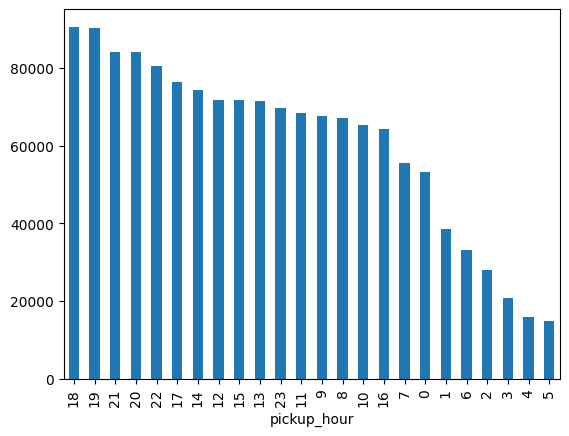

In [44]:
hue_hour.plot(kind = 'bar')

plt.show()

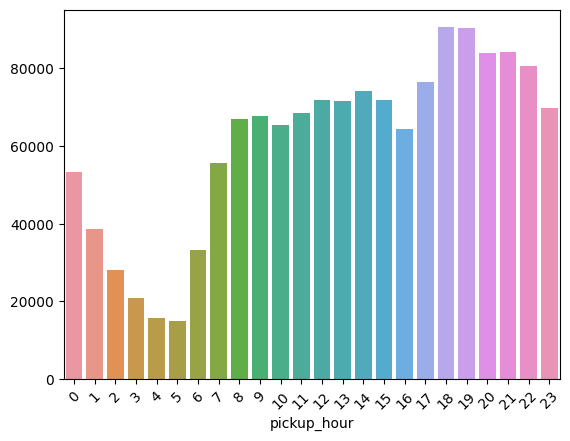

In [46]:
sns.barplot(x = hue_hour.index, y = hue_hour.values)

plt.xticks(rotation = 45)
plt.show()

In [50]:
taxi_data.groupby('pickup_hour')['trip_duration'].median()

pickup_hour
0     646.0
1     614.0
2     591.0
3     592.0
4     611.0
5     518.0
6     473.0
7     575.0
8     661.0
9     681.0
10    680.0
11    703.0
12    707.0
13    711.0
14    727.0
15    720.0
16    696.0
17    701.0
18    687.0
19    649.0
20    635.0
21    642.0
22    668.0
23    670.0
Name: trip_duration, dtype: float64

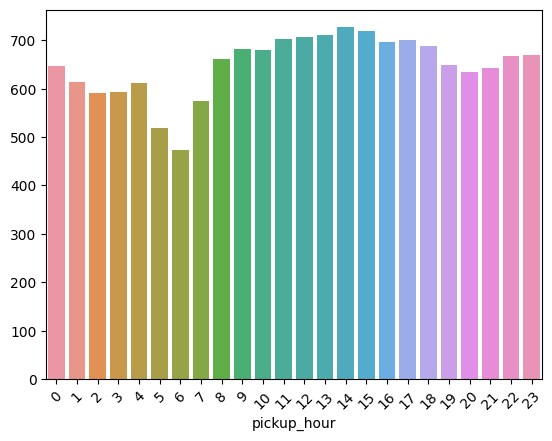

In [51]:
sns.barplot(x = taxi_data.groupby('pickup_hour')['trip_duration'].median().index,
            y = taxi_data.groupby('pickup_hour')['trip_duration'].median().values)

plt.xticks(rotation = 45)
plt.show()

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

taxi_data = pd.read_csv('taxi_data.csv')
taxi_data = taxi_data[taxi_data['trip_duration'] <= 24*3600]
taxi_data = taxi_data[taxi_data['avg_speed'] <= 300]
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration'] + 1)

taxi_data.head()

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster,pickup_hour,pickup_day_of_week,time,visibility,wind speed,precip,events,date,hour,temperature,avg_speed,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196,9,17,Monday,2016-03-14 17:00:00,8.0,27.8,0.3,None,2016-03-14,17.0,4.4,15.896176,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768,4,0,Sunday,2016-06-12 00:00:00,16.1,7.4,0.0,None,2016-06-12,0.0,28.9,13.646335,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165,4,11,Tuesday,2016-01-19 11:00:00,16.1,24.1,0.0,None,2016-01-19,11.0,-6.7,18.747119,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700,4,19,Wednesday,2016-04-06 19:00:00,16.1,25.9,0.0,None,2016-04-06,19.0,7.2,14.932028,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585,9,13,Saturday,2016-03-26 13:00:00,16.1,9.3,0.0,None,2016-03-26,13.0,9.4,13.364690,6.077642


In [3]:
taxi_data.groupby('pickup_day_of_week')['id'].count()

pickup_day_of_week
Friday       223484
Monday       187357
Saturday     220805
Sunday       195300
Thursday     218497
Tuesday      202696
Wednesday    210094
Name: id, dtype: int64

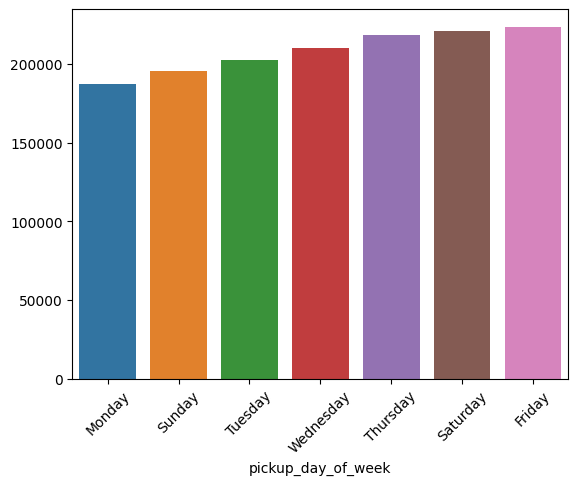

In [12]:
import matplotlib.pyplot as plt

sns.barplot(x = taxi_data.groupby('pickup_day_of_week')['id'].count().sort_values().index,
            y = taxi_data.groupby('pickup_day_of_week')['id'].count().sort_values().values)

plt.xticks(rotation = 45)
plt.show()

In [9]:
taxi_data.groupby('pickup_day_of_week')['trip_duration'].median().sort_values()

pickup_day_of_week
Sunday       602.0
Monday       630.0
Saturday     637.0
Tuesday      679.0
Friday       686.0
Wednesday    694.0
Thursday     710.0
Name: trip_duration, dtype: float64

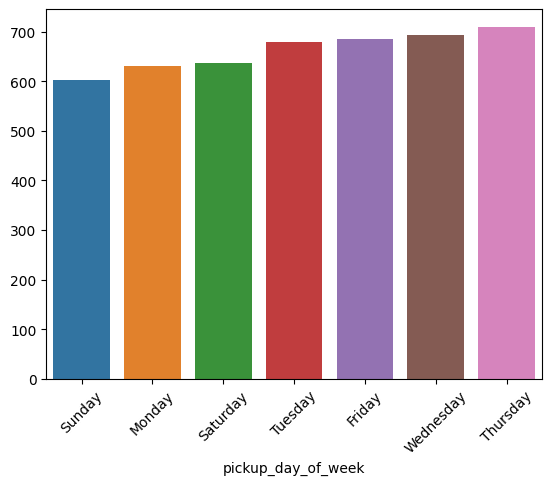

In [13]:
sns.barplot(x = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median().sort_values().index,
            y = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median().sort_values().values)

plt.xticks(rotation = 45)
plt.show()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

In [15]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)

pd.pivot_table(data = taxi_data, 
               values = 'trip_duration', aggfunc = 'median',
               index = 'pickup_hour',
               columns = 'pickup_day_of_week')

pickup_day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
pickup_hour,,,,,,,
0,649.0,598.0,685.0,675.0,609.0,591.0,601.0
1,600.0,567.0,640.0,643.0,564.0,584.0,553.0
2,572.0,565.0,610.0,604.5,576.0,565.0,544.0
3,578.0,600.0,591.0,608.0,584.0,568.0,574.0
4,634.0,640.0,610.0,598.5,595.0,600.5,616.0
5,532.0,519.0,631.0,634.0,480.0,455.0,448.0
6,476.0,462.0,508.0,554.0,471.0,461.0,463.0
7,578.0,575.0,481.0,474.0,599.0,586.0,593.0
8,689.0,672.0,489.0,460.0,721.0,703.0,704.0


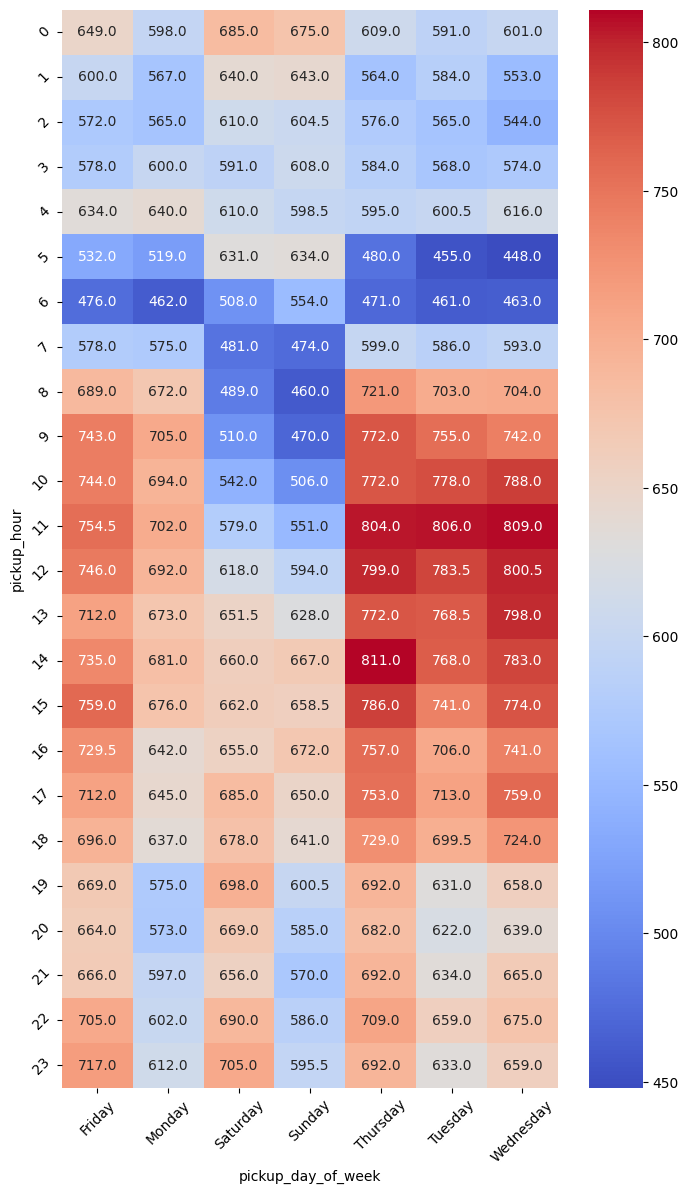

In [42]:
plt.figure(figsize = (8, 14))
sns.heatmap(data = pd.pivot_table(data=taxi_data, values='trip_duration', aggfunc='median', 
                                  index = 'pickup_hour', columns='pickup_day_of_week'),
            cmap = 'coolwarm', #рекомендуемая палитра
            annot = True, 
            fmt = '.1f')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


In [31]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

/home/gkuznetsov@prominn.local/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


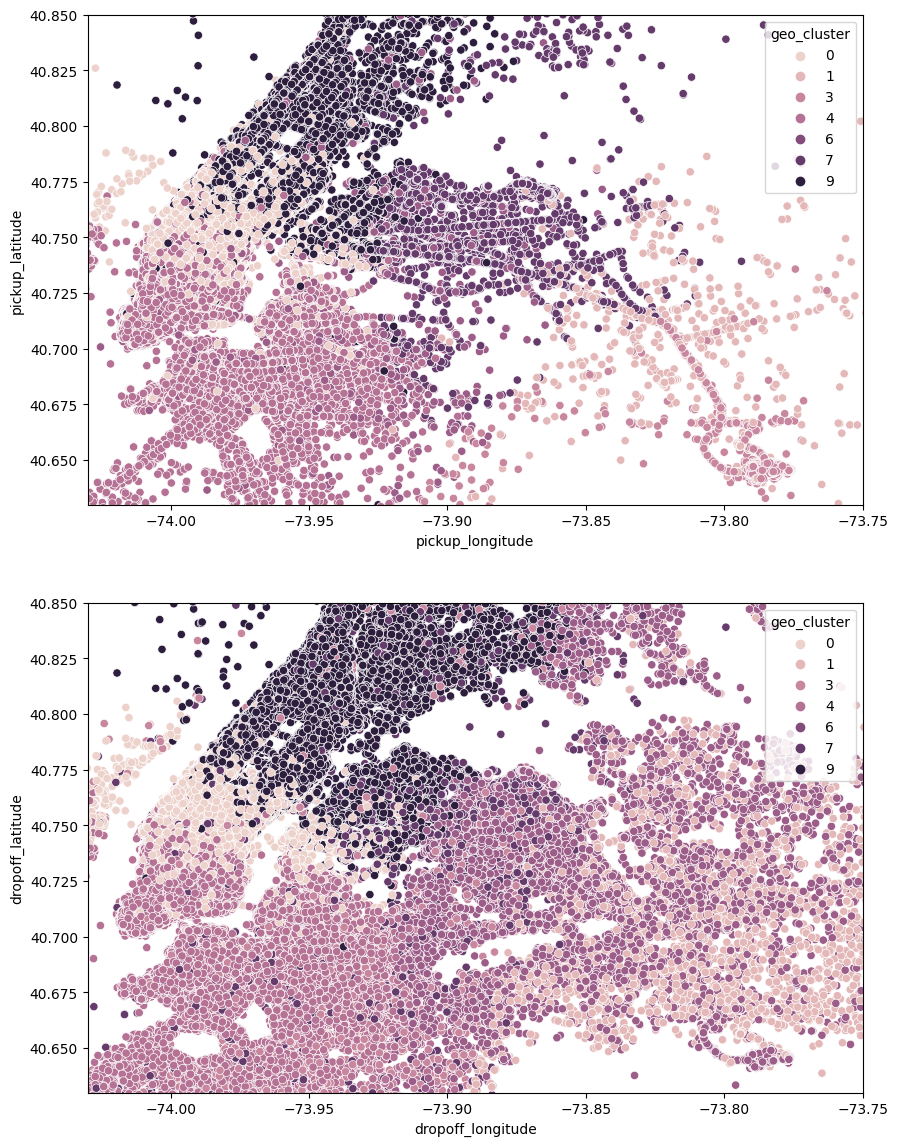

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 14))
sns.scatterplot(data = taxi_data, x = taxi_data.pickup_longitude, y = taxi_data.pickup_latitude, ax = ax1,
                hue = taxi_data.geo_cluster)
sns.scatterplot(data = taxi_data, x = taxi_data.dropoff_longitude, y = taxi_data.dropoff_latitude, ax = ax2,
                hue = taxi_data.geo_cluster)

ax1.set_xlim(city_long_border)
ax1.set_ylim(city_lat_border)

ax2.set_xlim(city_long_border)
ax2.set_ylim(city_lat_border)

plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [43]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 31)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_holiday', 'total_distance',
       'total_travel_time', 'number_of_steps', 'haversine', 'direction',
       'geo_cluster', 'pickup_hour', 'pickup_day_of_week', 'time',
       'visibility', 'wind speed', 'precip', 'events', 'date', 'hour',
       'temperature', 'avg_speed', 'trip_duration_log'],
      dtype='object')


In [3]:
taxi_data.drop(labels = ['time', 'avg_speed', 'date', 'hour'], axis = 1, inplace = True)

In [6]:
taxi_data.shape

(1458233, 27)

Для удобства работы сделаем копию исходной таблицы с поездками:

In [4]:
train_data = taxi_data.copy()
train_data.drop(labels = ['id', 'dropoff_datetime'], axis = 1, inplace = True)
train_data.shape[1]

25

In [53]:
taxi_data.shape[1]

25

In [54]:
train_data.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,geo_cluster,pickup_hour,pickup_day_of_week,visibility,wind speed,precip,events,temperature,trip_duration_log
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,2009.1,164.9,5.0,1.498521,99.970196,9,17,Monday,8.0,27.8,0.3,None,4.4,6.122493
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,2513.2,332.0,6.0,1.805507,-117.153768,4,0,Sunday,16.1,7.4,0.0,None,28.9,6.498282
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,0,11060.8,767.6,16.0,6.385098,-159.680165,4,11,Tuesday,16.1,24.1,0.0,None,-6.7,7.661527
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,0,1779.4,235.8,4.0,1.485498,-172.737700,4,19,Wednesday,16.1,25.9,0.0,None,7.2,6.063785
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,0,1614.9,140.1,5.0,1.188588,179.473585,9,13,Saturday,16.1,9.3,0.0,None,9.4,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [5]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [57]:
train_data.vendor_id.unique()

array([2, 1])

In [6]:
# vendor_id -> boolean
train_data['vendor_id'] = 1 * (train_data.vendor_id.values == 2)

In [61]:
train_data.vendor_id.mean()

0.53497486341346

In [7]:
# store_and_fwd_flag -> boolean
train_data['store_and_fwd_flag'] = 1 * (train_data.store_and_fwd_flag.values == 'Y')

In [62]:
train_data.store_and_fwd_flag.mean()

0.005514207948935458

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe_enc = OneHotEncoder(drop = 'first')
ohe_res = ohe_enc.fit_transform(taxi_data[['pickup_day_of_week', 'geo_cluster', 'events']]) #numpy-array

In [69]:
ohe_enc.categories_

[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array(['Fog', 'None', 'Rain', 'Snow'], dtype=object)]

In [78]:
ohe_enc.get_feature_names_out()

array(['pickup_day_of_week_Monday', 'pickup_day_of_week_Saturday',
       'pickup_day_of_week_Sunday', 'pickup_day_of_week_Thursday',
       'pickup_day_of_week_Tuesday', 'pickup_day_of_week_Wednesday',
       'geo_cluster_1', 'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_4',
       'geo_cluster_5', 'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8',
       'geo_cluster_9', 'events_None', 'events_Rain', 'events_Snow'],
      dtype=object)

In [9]:
ohe_df = pd.DataFrame(ohe_res.toarray(), columns = ohe_enc.get_feature_names_out())

In [80]:
ohe_df.shape

(1458233, 18)

Добавим полученную таблицу с закодированными признаками:

In [10]:
train_data.reset_index(drop=True).drop(labels = ['pickup_day_of_week', 'geo_cluster', 'events'], axis = 1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine,direction,pickup_hour,visibility,wind speed,precip,temperature,trip_duration_log
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,2009.1,164.9,5.0,1.498521,99.970196,17,8.0,27.8,0.3,4.4,6.122493
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,2513.2,332.0,6.0,1.805507,-117.153768,0,16.1,7.4,0.0,28.9,6.498282
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,0,11060.8,767.6,16.0,6.385098,-159.680165,11,16.1,24.1,0.0,-6.7,7.661527
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,0,1779.4,235.8,4.0,1.485498,-172.737700,19,16.1,25.9,0.0,7.2,6.063785
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,0,1614.9,140.1,5.0,1.188588,179.473585,13,16.1,9.3,0.0,9.4,6.077642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458228,1,4,-73.982201,40.745522,-73.994911,40.740170,0,778,0,2234.6,311.7,8.0,1.225080,-119.059338,13,16.1,11.1,0.0,7.8,6.658011
1458229,0,1,-74.000946,40.747379,-73.970184,40.796547,0,655,0,7638.0,589.6,11.0,6.049836,25.342196,7,2.8,18.5,8.1,7.2,6.486161
1458230,1,1,-73.959129,40.768799,-74.004433,40.707371,0,764,0,9871.5,642.9,10.0,7.824606,-150.788492,6,16.1,0.0,0.0,18.3,6.639876
1458231,0,1,-73.982079,40.749062,-73.974632,40.757107,0,373,0,1628.3,161.6,7.0,1.092564,35.033294,15,16.1,9.3,0.0,-2.8,5.924256


In [11]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(labels = ['pickup_day_of_week', 'geo_cluster', 'events'], 
                                            axis = 1), 
     ohe_df], axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [12]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [13]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [18]:
kbest = SelectKBest(score_func = f_regression, k = 25)

In [19]:
kbest.fit(X_train, y_train_log)

SelectKBest(k=25, score_func=<function f_regression at 0x70dc3fc5d6a8>)

In [114]:
kbest.scores_

array([3.45587625e+02, 3.96707626e+02, 1.48296321e+04, 2.34354294e+04,
       6.36712432e+03, 1.58500694e+04, 2.41019017e+02, 6.09273590e+02,
       6.55929432e+05, 9.55479068e+05, 6.11337580e+05, 5.81670763e+05,
       1.10949910e+01, 1.54681756e+03, 4.45802418e+01, 1.09038826e+00,
       2.17331997e+01, 3.26640032e+03, 3.63048803e+02, 6.06627793e+02,
       1.94366507e+03, 9.59208273e+02, 1.79139493e+02, 5.83529967e+02,
       1.55574413e+02, 4.65438333e-01, 5.93193529e+04, 3.09836404e-01,
       5.14059801e+04, 3.03904228e+00, 2.78680651e+04, 4.23596904e-03,
       2.44291291e+04, 1.18407701e+00, 1.84342546e+00, 2.76666220e+01])

In [20]:
kbest.get_support(indices = True) #get indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 17, 18, 19, 20,
       21, 22, 23, 24, 26, 28, 30, 32])

In [22]:
X_train.columns[kbest.get_support(indices = True)].tolist()

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_holiday',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine',
 'pickup_hour',
 'temperature',
 'pickup_day_of_week_Monday',
 'pickup_day_of_week_Saturday',
 'pickup_day_of_week_Sunday',
 'pickup_day_of_week_Thursday',
 'pickup_day_of_week_Tuesday',
 'pickup_day_of_week_Wednesday',
 'geo_cluster_1',
 'geo_cluster_3',
 'geo_cluster_5',
 'geo_cluster_7',
 'geo_cluster_9']

In [14]:
selected_columns = ['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_holiday',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine',
 'pickup_hour',
 'temperature',
 'pickup_day_of_week_Monday',
 'pickup_day_of_week_Saturday',
 'pickup_day_of_week_Sunday',
 'pickup_day_of_week_Thursday',
 'pickup_day_of_week_Tuesday',
 'pickup_day_of_week_Wednesday',
 'geo_cluster_1',
 'geo_cluster_3',
 'geo_cluster_5',
 'geo_cluster_7',
 'geo_cluster_9']

In [17]:
X_train = X_train[X_train.columns[kbest.get_support(indices = True)].tolist()]

NameError: name 'kbest' is not defined

In [46]:
kbest.get_support(indices = True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 17, 18, 19, 20,
       21, 22, 23, 24, 26, 28, 30, 32])

In [15]:
X_train = X_train[selected_columns]
X_valid = X_valid[selected_columns]

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train_scaled = min_max_scaler.transform(X_train)
X_valid_scaled = min_max_scaler.transform(X_valid)

In [18]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.0,0.714286,0.791689,0.640746,0.791559,0.732433,0.0,0.0,0.011138,0.020290,0.022727,0.001242,0.739130,0.718812,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.142857,0.791685,0.641315,0.791987,0.735215,0.0,0.0,0.036117,0.057462,0.000000,0.005649,0.304348,0.439604,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.142857,0.791115,0.637966,0.790966,0.729122,0.0,0.0,0.018553,0.049652,0.000000,0.002901,0.478261,0.572277,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.142857,0.791255,0.638605,0.790817,0.727307,0.0,0.0,0.085916,0.169045,0.136364,0.008974,0.652174,0.427723,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.142857,0.791730,0.641120,0.791702,0.732704,0.0,0.0,0.003599,0.006372,0.000000,0.000563,0.782609,0.603960,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977011,1.0,0.142857,0.791399,0.637236,0.791219,0.728705,0.0,0.0,0.019791,0.051864,0.090909,0.002651,0.869565,0.681188,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
977012,0.0,0.428571,0.791317,0.639087,0.791176,0.730664,0.0,0.0,0.033177,0.056754,0.090909,0.001763,0.086957,0.427723,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
977013,0.0,0.142857,0.791624,0.643169,0.791778,0.735961,0.0,0.0,0.026960,0.045890,0.159091,0.003310,0.913043,0.770297,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
977014,0.0,0.142857,0.791410,0.639458,0.791258,0.731219,0.0,0.0,0.013580,0.033123,0.022727,0.001527,0.260870,0.362376,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
np.mean(pd.DataFrame(X_train_scaled)[0])

0.5347486632767529

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977016 entries, 293850 to 121958
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     977016 non-null  int64  
 1   passenger_count               977016 non-null  int64  
 2   pickup_longitude              977016 non-null  float64
 3   pickup_latitude               977016 non-null  float64
 4   dropoff_longitude             977016 non-null  float64
 5   dropoff_latitude              977016 non-null  float64
 6   store_and_fwd_flag            977016 non-null  int64  
 7   pickup_holiday                977016 non-null  int64  
 8   total_distance                977016 non-null  float64
 9   total_travel_time             977016 non-null  float64
 10  number_of_steps               977016 non-null  float64
 11  haversine                     977016 non-null  float64
 12  pickup_hour                   977016 no

### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(X_train_scaled, y_train_log)
y_train_pred = lin_reg.predict(X_train_scaled)

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train_log, y_train_pred, squared = False)

0.5356435185027016

In [74]:
y_valid_pred = lin_reg.predict(X_valid_scaled)

In [75]:
mean_squared_error(y_valid_log, y_valid_pred, squared = False)

0.5380984271876291

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [31]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train_scaled, y_train_log)

DecisionTreeRegressor(random_state=42)

In [32]:
y_train_pred = tree.predict(X_train_scaled)
y_valid_pred = tree.predict(X_valid_scaled)

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train_log, y_train_pred, squared = False)

0.0030491915836393033

In [34]:
mean_squared_error(y_valid_log, y_valid_pred, squared = False)

0.5654544638682657

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [56]:
#DecisionTreeRegressor(max_depth = None, random_state = 42)

def get_depth(max_depth, X_train, X_test, y_train, y_test):
    tree = DecisionTreeRegressor(max_depth = max_depth, random_state = 42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    rmsle = mean_squared_error(y_test, y_pred, squared = False)
    return rmsle

In [57]:
rmsle_train = []
for i in range(7, 21):
    rmsle_train.append(get_depth(i, X_train = X_train_scaled, X_test = X_train_scaled, 
                                 y_train = y_train_log, y_test = y_train_log))

In [37]:
rmsle_train

[0.44482226301161476,
 0.4370482517908321,
 0.4300224596438318,
 0.4225987249602168,
 0.4147649942396256,
 0.406101957661797,
 0.39578818966231416,
 0.3840346826605088,
 0.3707282424026017,
 0.3561351015834133,
 0.3399148185859644,
 0.32288513385059536,
 0.30460100483936803,
 0.2855071657401996]

In [38]:
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('rmsle, fontsize=12)
plt.plot([i for i in range(7, 21)], rmsle_train, 'xb-')

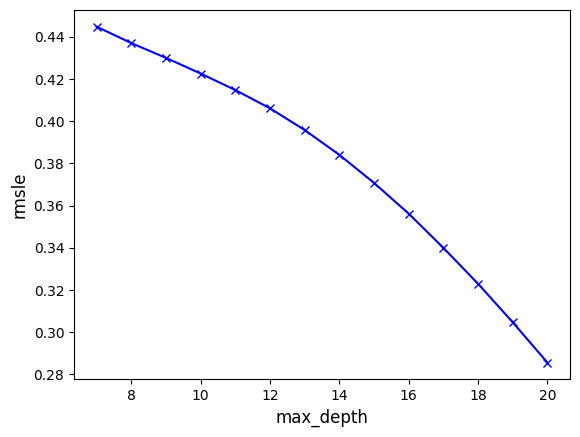

In [39]:
plt.show()

In [58]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(data = rmsle_train, index = range(7, 21), columns = ['RMSLE'])

,RMSLE
7,0.44
8,0.44
9,0.43
10,0.42
11,0.41
12,0.41
13,0.40
14,0.38
15,0.37
16,0.36


In [44]:
rmsle_valid = []
for i in range(7, 21):
    rmsle_valid.append(get_depth(i, X_train = X_train_scaled, X_test = X_valid_scaled, 
                                 y_train = y_train_log, y_test = y_valid_log))

In [46]:
rmsle_valid

[0.44717395454940917,
 0.4408030164068235,
 0.43597561951793334,
 0.4314733164020744,
 0.43053502131493365,
 0.43006372786093344,
 0.43250181688000544,
 0.4380444189452328,
 0.4456789687129799,
 0.4539745984383633,
 0.4618298169684877,
 0.4730614603437974,
 0.4826399063073675,
 0.4934032554796865]

In [47]:
[i for i in range(7, 21)]

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

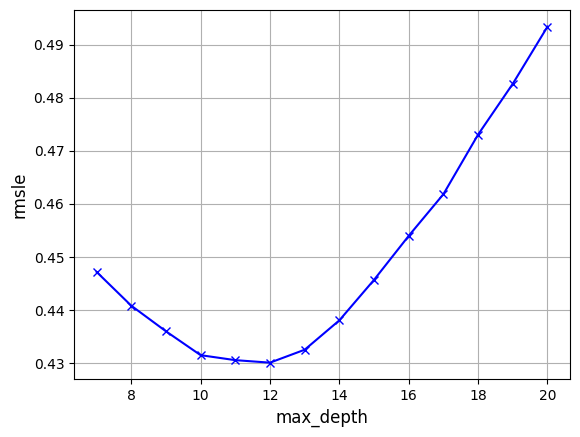

In [48]:
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('rmsle', fontsize=12)
plt.plot([i for i in range(7, 21)], rmsle_valid, 'xb-')

plt.grid(True)
plt.show()

In [53]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(data = rmsle_valid, index = range(7, 21), columns = ['RMSLE'])

,RMSLE
7,0.45
8,0.44
9,0.44
10,0.43
11,0.43
12,0.43
13,0.43
14,0.44
15,0.45
16,0.45


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [26]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators = 200,
                            max_depth = 12,
                            criterion = 'squared_error',
                            min_samples_split = 20,
                            random_state = 42,
                            verbose = True) #отображать процесс обучения

reg.fit(X_train_scaled, y_train_log)

RandomForestRegressor(max_depth=12, min_samples_split=20, n_estimators=200,
                      random_state=42)

In [28]:
from sklearn.metrics import mean_squared_error

def get_rmsle(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmsle = mean_squared_error(y_test, y_pred, squared = False)
    return rmsle

In [30]:
get_rmsle(model = reg, X_test = X_train_scaled, y_test = y_train_log)

0.3992525841016545

In [31]:
get_rmsle(model = reg, X_test = X_valid_scaled, y_test = y_valid_log)

0.41411896952120025

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(learning_rate = 0.5,
                                n_estimators = 100,
                                max_depth = 6,
                                min_samples_split = 30,
                                random_state = 42,
                                verbose = True)

In [34]:
reg.fit(X_train_scaled, y_train_log) #100 итераций

      Iter       Train Loss   Remaining Time 
         1           0.3110            9.01m
         2           0.2247            8.88m
         3           0.1987            8.76m
         4           0.1875            8.64m
         5           0.1821            8.54m
         6           0.1789            8.42m
         7           0.1742            8.35m
         8           0.1721            8.29m
         9           0.1705            8.19m
        10           0.1694            8.11m
        20           0.1585            7.16m
        30           0.1532            6.28m
        40           0.1500            5.37m
        50           0.1468            4.45m
        60           0.1439            3.55m
        70           0.1421            2.65m
        80           0.1402            1.77m
        90           0.1383           52.86s
       100           0.1371            0.00s


GradientBoostingRegressor(learning_rate=0.5, max_depth=6, min_samples_split=30,
                          random_state=42, verbose=True)

In [35]:
get_rmsle(model = reg, X_test = X_train_scaled, y_test = y_train_log)

0.370280141889469

In [36]:
get_rmsle(model = reg, X_test = X_valid_scaled, y_test = y_valid_log)

0.392520863934422

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [38]:
selected_columns

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_holiday',
 'total_distance',
 'total_travel_time',
 'number_of_steps',
 'haversine',
 'pickup_hour',
 'temperature',
 'pickup_day_of_week_Monday',
 'pickup_day_of_week_Saturday',
 'pickup_day_of_week_Sunday',
 'pickup_day_of_week_Thursday',
 'pickup_day_of_week_Tuesday',
 'pickup_day_of_week_Wednesday',
 'geo_cluster_1',
 'geo_cluster_3',
 'geo_cluster_5',
 'geo_cluster_7',
 'geo_cluster_9']

In [37]:
reg.feature_importances_

array([3.93247484e-03, 8.31792625e-04, 1.22899698e-02, 1.18531612e-02,
       1.28262334e-02, 2.89318583e-02, 2.94540768e-05, 1.46531064e-03,
       6.28323686e-01, 1.86225087e-01, 5.75480622e-03, 2.57580931e-02,
       5.74387506e-02, 4.39474151e-03, 2.21668508e-03, 7.54208931e-03,
       7.15181382e-03, 3.26254730e-04, 7.14332852e-04, 5.99974507e-04,
       5.29515299e-04, 6.74936039e-05, 1.93704002e-04, 1.91592200e-04,
       4.11125284e-04])

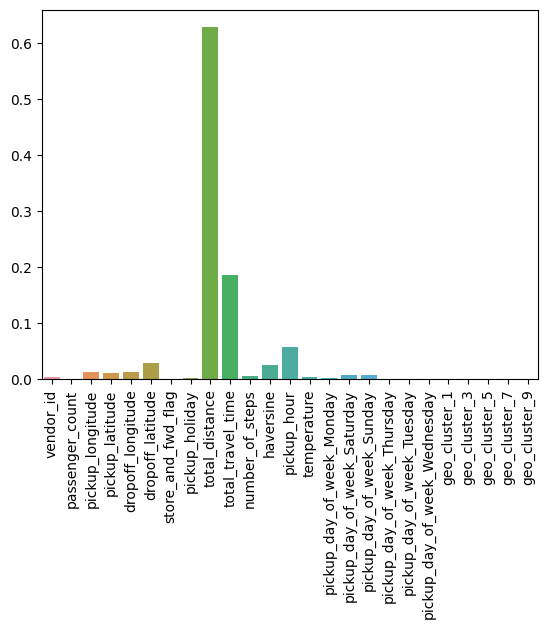

In [40]:
sns.barplot(x = selected_columns, y = reg.feature_importances_)

plt.xticks(rotation = 90)
plt.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [27]:
from sklearn.metrics import median_absolute_error

In [42]:
y_pred = reg.predict(X_valid_scaled)

In [54]:
median_absolute_error(np.exp(y_valid_log) - 1, np.exp(y_pred) - 1)

109.82806532295308

In [55]:
(median_absolute_error(np.exp(y_valid_log) - 1, np.exp(y_pred) - 1) / 60).round(1)

1.8

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)